# Coup-Proofing via Capital Relocation

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Jeff Jacobs (Georgetown University)

## Introduction

Several previous studies have found robust relationships between spatial properties of a country’s **capital city** and that country’s propensity for **conflict** and **misgovernance**.

Perceptions of this linkage also have an effect on “coup-proofing” decisions made by national governments. A recent BBC interview with Equatorial Guinea’s President Teodoro Obiang, for example, highlighted this as a factor behind his decision to relocate the capital city:

> It’s the remoteness of Oyala that makes it so appealing to President Obiang. In a rare interview he described how rebels had recently plotted a seaborne assault on his palace in the current capital, Malabo. ‘We need a secure place for my government and for future governments. That’s why we have created Oyala, to guarantee the government of Equatorial Guinea.’ \[@sackur_equatorial_2012\]

This case is far from exceptional, as an even more recent *Washington Post* article points out with respect to Myanmar’s decision to move its capital from Yangon to Naypyidaw:

> Analysts have described the decision as motivated by a desire to secure the military’s seat of power from any threat of protests or invasions. \[@berger_myanmars_2021\]

Most of these studies, however, are based on observations of **conflict events**. In this study, we study the more fundamental variable of a capital’s distance from the **population centroid** of the country.

## Literature Review

@campante_capital_2019 analyzes the relationship between the location of a **capital city** and the degree of conflict and misgovernance in a given country. Their two key findings are that:

> Conflict is more likely to emerge (and dislodge incumbents) closer to the capital

and

> Isolated capitals are associated with misgovernance.

This first finding is illustrated in @fig-conflict-dist

{#fig-conflict-dist }

## Methodology

The **population centroids** we use herein might require some explanation, since the term “centroid” can be ambiguous.

Here, the population centroids are drawn from @hall_population_2019

## Exploratory Data Analysis (EDA)

Here we plot the base GIS objects we’re analyzing: the location of each **capital city** (in purple) and each **population centroid** (in yellow).

In [ ]:
library(tidyverse) |> suppressPackageStartupMessages()
library(sf) |> suppressPackageStartupMessages()
library(mapview) |> suppressPackageStartupMessages()
library(units) |> suppressPackageStartupMessages()
cb_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [ ]:
merged_long_sf <- readRDS("merged_long_sf.rds")
mapview(merged_long_sf, zcol="name", cex=4, label="geounit")

Warning in validateCoords(lng, lat, funcName): Data contains 3 rows with either
missing or invalid lat/lon values and will be ignored

We then construct an **area-normalized** measure of capital-centroid distance $\text{dist}^{\textsf{AN}}$, using the formula

$$
\text{dist}^{\textsf{AN}}_i = \text{dist}_i / \sqrt{\text{area}_i}.
$$

A plot of this measure by country looks as follows:

In [ ]:
merged_area_sf <- readRDS("merged_area_sf.rds")
mapview(merged_area_sf, zcol="scaled_dist")

## Hypothesis Testing (Regression)

In [ ]:
merged_sub_sf <- readRDS("merged_sub_sf.rds")
merged_sub_sf |> head()

  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  geounit      iso_a3     OBJECTID   ID_0 NAME_ENGLI     OUT_FLAG NAME                 dist      area   scaled_dist   total_score geometry       centroid     capital
  ------------ -------- ---------- ------ ------------ ---------- ------------- ----------- --------- ------------- ------------- -------------- ------------ ------------
  Tanzania     TZA             227    227 Tanzania              0 Dar es Salaam    324758.1    885800      345.0580         0.007 MULTIPOLYGON   POINT        POINT
                                                                                      \[m\]                   \[m\]               (((33.90371    (36.5813     (39.2664
                                                                                                                                  -0...          -5.612844)   -6.798067)

  Canada       CAN              42     42 Canada                0 Ottawa          1410811.7   8788700      475.8902         0.001 MULTIPOLYGON   POINT        POINT
                                                                                      \[m\]                   \[m\]               (((-122.84     (-92.673     (-75.70196
                                                                                                                                  49,...         51.33108)    45.41864)

  United       USA             244    244 United                0 Washington,     1227411.4   9147420      405.8269         0.022 MULTIPOLYGON   POINT        POINT
  States of                               States                  D.C.                \[m\]                   \[m\]               (((-122.84     (-91.24719   (-77.01136
  America                                                                                                                         49,...         39.43566)    38.9015)

  Kazakhstan   KAZ             117    117 Kazakhstan            0 Nur-Sultan       227074.6   2699700      138.2009         0.010 MULTIPOLYGON   POINT        POINT
                                                                                      \[m\]                   \[m\]               (((87.35997    (69.7252     (71.42777
                                                                                                                                  49...          49.45229)    51.18113)

  Uzbekistan   UZB             246    246 Uzbekistan            0 Tashkent         168011.1    440653      253.0985         0.005 MULTIPOLYGON   POINT        POINT
                                                                                      \[m\]                   \[m\]               (((55.96819    (67.77264    (69.26882
                                                                                                                                  41...          40.30358)    41.30383)

  Papua New    PNG             175    175 Papua New             0 Port Moresby     289887.1    452860      430.7714         0.025 MULTIPOLYGON   POINT        POINT
  Guinea                                  Guinea                                      \[m\]                   \[m\]               (((141.0002    (146.2921    (147.1925
                                                                                                                                  -2...          -7.014699)   -9.464708)
  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------


3.5.0.

(`stat_smooth()`).

ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?

(`geom_point()`).

(`geom_text()`).

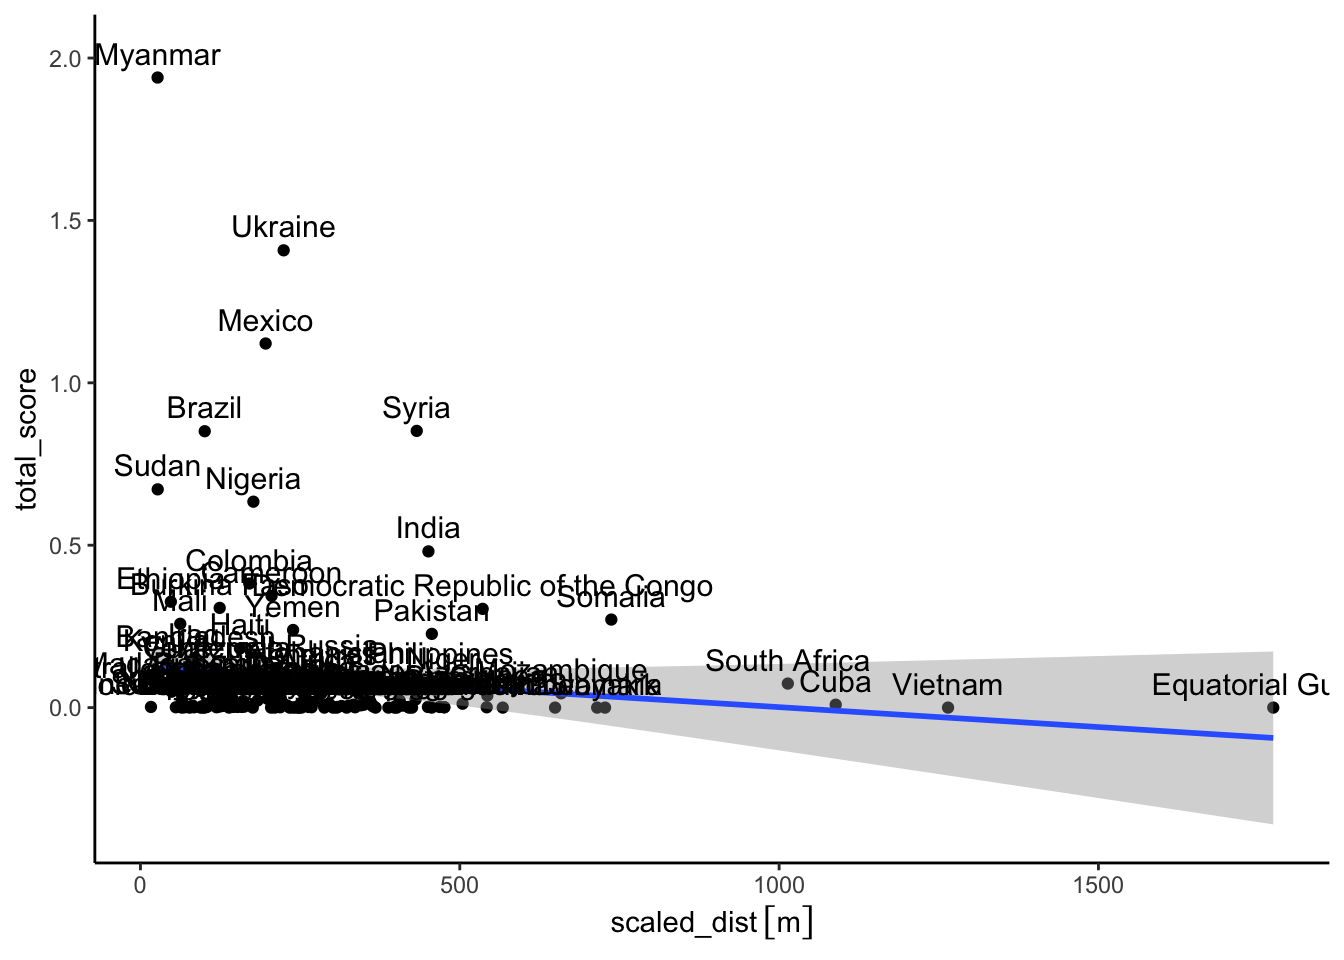

In [ ]:
merged_sub_sf |> ggplot(aes(x=scaled_dist, y=total_score, label=NAME_ENGLI)) +
  geom_point() +
  geom_smooth(method='lm', formula= y~x) +
  geom_text(size=4, nudge_y = 0.075) +
  theme_classic()

## Discussion

## Conclusion

Our evidence indicates that the spatial dynamics of **conflict** differ from the spatial dynamics of **misgovernance**. Whereas